# 1. Linear Regression
*Tham khảo: [Scikit-Learn - Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)*

## 1.1. Thuật toán OLS 

[Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) hay còn gọi là hồi quy tuyến tính, là thuật toán đơn giản nhất trong các thuật toán học có giám sát (supervised learning). Linear (tuyến tính) được hiểu là thẳng/phẳng. Một hàm số tuyến tính sẽ có dạng:
- một đường thẳng (line) trong không gian 2 chiều
- một mặt phẳng (plane) trong không gian 3 chiều
- một siêu phẳng (hyperplane) đối với không gian n chiều

Phương trình hồi quy sẽ biểu diễn mối quan hệ tuyến tính giữa các biến đầu vào $\mathbf{x}_1,\mathbf{x}_2,\dots$ tới biến đầu ra $\mathbf{y}$. Phương trình hồi quy có dạng:

$$\hat{\mathbf{y}} = w_0+w_1\mathbf{x}_1+w_2\mathbf{x}_2+\dots$$

Trong đó:
- $\mathbf{y}$ là biến đầu ra (biến phụ thuộc)
- $\hat{\mathbf{y}}$ là các giá trị dự đoán của $\mathbf{y}$
- $\mathbf{x}_1,\mathbf{x}_2,\dots$ là các biến đầu vào
- $w_0,w_1,w_2,\dots$ là các hệ số

### Hàm mất mát (The loss function)

Khi sử dụng hồi quy tuyến tính, chúng ta sẽ muốn các giá trị dự đoán $\hat{\mathbf{y}}$ gần sát với các giá trị đầu vào $y$ nhất, tương đương với việc tổng sai số là nhỏ nhất. Phương pháp bình phương nhỏ nhất (OLS) được sử dụng để tìm các hệ số  $\mathbf{w}$ sao cho giá trị hàm số sau nhỏ nhất:

$$L(\mathbf{w}) = \mbox{SSE}=\sum_{n=1}^{N}(y_n-\hat{y}_n)^2$$

Mục tiêu của bài toán là cần tìm bộ tham số $\mathbf{w}$ sao cho: $\mathbf{w} =\arg\min L(\mathbf{w})$. Cách tìm các hệ số là sử dụng đạo hàm - đây là lý do nên sử dụng hàm mất mát là tổng bình phương thay vì tổng trị tuyệt đối.

### Hạn chế
- Linear Regression rất nhạy cảm với giá trị ngoại biên (outliers). Các giá trị này sẽ làm thay đổi đáng kể các hệ số $w$ và làm sai lệch giá trị dự đoán. Để thuật toán hoạt động tốt nhất cần có bước tiền xử lí dữ liệu để loại bỏ nhiễu.
- Linear Regression bị giới hạn trong mối quan hệ tuyến tính và không biểu diễn được mối quan hệ dữ liệu phức tạp. Do đó Linear Regression thường gặp tình trạng overfitting.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4, suppress=True)
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE
from sklearn.preprocessing import StandardScaler

In [31]:
dfBoston = pd.read_csv('data/boston.csv')

X = dfBoston.drop(columns='price').values
y = dfBoston.price.values

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=11)

In [32]:
dfBoston

,crime_rate,land_rate,indus,chas,nox,room,age,distance,radial,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [35]:
dfBoston.price.mean()

22.532806324110698

### Thực thi

In [49]:
ols = LinearRegression()
ols = ols.fit(XTrain, yTrain)

In [34]:
dfBoston.columns

Index(['crime_rate', 'land_rate', 'indus', 'chas', 'nox', 'room', 'age',
       'distance', 'radial', 'tax', 'ptratio', 'black', 'lstat', 'price'],
      dtype='object')

In [97]:
ols.coef_ # coefficients

array([ -0.0963,   0.0458,   0.0169,   3.5955, -19.0173,   4.243 ,
         0.0132,  -1.3804,   0.303 ,  -0.0115,  -0.8875,   0.0108,
        -0.5252])

In [98]:
ols.intercept_ 

31.226462364827434

In [50]:
r2Train = ols.score(XTrain, yTrain)
r2Test = ols.score(XTest, yTest)

print(f'R2 training: {r2Train:.2%}')
print(f'R2 testing: {r2Test:.2%}')

R2 training: 75.12%
R2 testing: 68.59%


In [51]:
yTrainPred = ols.predict(XTrain)
yTestPred = ols.predict(XTest)

rmseTrain = MSE(yTrain, yTrainPred, squared=False)
rmseTest =  MSE(yTest, yTestPred, squared=False)

print(f'RMSE training: {rmseTrain:.2f}')
print(f'RMSE testing: {rmseTest:.2f}')

RMSE training: 4.57
RMSE testing: 5.19


In [101]:
yTestPred[:5]

array([23.6228,  3.5039, 27.6501, 26.2818,  6.5712])

In [48]:
ols.predict(XTrainScaled)[:5]

array([32.103 , 21.1678, 18.0142, 19.6476, 34.1027])

In [52]:
ols.predict(XTrain)[:5]

array([32.103 , 21.1678, 18.0142, 19.6476, 34.1027])

In [37]:
yTest[:5]

array([23.4,  8.1, 22. , 15. , 10.4])

### Tiền xử lý dữ liệu
Standardization là kỹ thuật biến đổi một biến sao cho có trung bình bằng 0 và độ lệch chuẩn bằng 1. Cách thực hiện?

In [38]:
a = np.array([
    [1],
    [5],
    [6],
    [8]
])
b = (a - a.mean()) / a.std()
b

array([[-1.5689],
       [ 0.    ],
       [ 0.3922],
       [ 1.1767]])

In [39]:
b.mean()

0.0

In [40]:
b.std()

1.0

In [41]:
scaler = StandardScaler()
scaler = scaler.fit(a)

In [42]:
scaler.mean_

array([5.])

In [69]:
scaler.scale_

array([2.5495])

In [70]:
scaler.transform(a)

array([[-1.5689],
       [ 0.    ],
       [ 0.3922],
       [ 1.1767]])

In [18]:
scaler = StandardScaler()
scaler.fit_transform(a)

array([[-1.5689],
       [ 0.    ],
       [ 0.3922],
       [ 1.1767]])

Trong ML, đâu là cách áp dụng scale đúng?
- Chuẩn hoá toàn bộ dữ liệu trước, sau đó chia tập train-test
- Chia tập train-test trước, sau đó chuẩn hoá tập train và tập test riêng
- Chia tập train-test trước, chuẩn hoá tập train, sau đó dùng thông số của scaler này để biến đổi tập test

data leakage

In [44]:
scalerTrain.mean_

array([  3.5234,  11.3106,  11.0552,   0.0693,   0.5508,   6.274 ,
        67.6908,   3.8563,   9.4629, 404.948 ,  18.4619, 358.0571,
        12.5142])

In [45]:
scalerTrain.scale_

array([  8.6929,  23.349 ,   6.792 ,   0.254 ,   0.1153,   0.6927,
        28.0526,   2.1212,   8.6703, 167.7398,   2.1278,  89.2541,
         7.0719])

In [53]:
# train the model on the scaled X
scalerTrain = StandardScaler()
scalerTrain = scalerTrain.fit(XTrain)

XTrainScaled = scalerTrain.transform(XTrain)

ols = LinearRegression()
ols = ols.fit(XTrainScaled, yTrain)

In [54]:
ols.score(XTrainScaled, yTrain)

0.7511508467017516

In [102]:
yTest[:5]

array([23.4,  8.1, 22. , 15. , 10.4])

In [104]:
XTestScaled = scalerTrain.transform(XTest)
ols.predict(XTestScaled)[:5]

array([23.6228,  3.5039, 27.6501, 26.2818,  6.5712])

In [55]:
scalerTest = StandardScaler()
XTestScaled = scalerTest.fit_transform(XTest)

ols.predict(XTestScaled)[:5]

array([23.3854,  4.6504, 27.2772, 26.3194,  7.5797])

In [106]:
XTestScaled = StandardScaler().fit_transform(XTest[:3, :])
ols.predict(XTestScaled)[:5]

array([27.4202,  4.3766, 36.2089])

In [107]:
XTestScaled = scalerTrain.transform(XTest[:3, :])
ols.predict(XTestScaled)[:5]

array([23.6228,  3.5039, 27.6501])

In [97]:
ols.coef_ # chua chuan hoa

array([ -0.0963,   0.0458,   0.0169,   3.5955, -19.0173,   4.243 ,
         0.0132,  -1.3804,   0.303 ,  -0.0115,  -0.8875,   0.0108,
        -0.5252])

In [122]:
ols.coef_ # chuan hoa roi

array([-0.8368,  1.0703,  0.1145,  0.9132, -2.1927,  2.939 ,  0.3696,
       -2.9281,  2.6273, -1.9361, -1.8885,  0.9665, -3.7143])

In [56]:
dfBoston.columns

Index(['crime_rate', 'land_rate', 'indus', 'chas', 'nox', 'room', 'age',
       'distance', 'radial', 'tax', 'ptratio', 'black', 'lstat', 'price'],
      dtype='object')

In [60]:
pd.DataFrame({
    'feature': dfBoston.columns[:-1],
    'coef_raw': np.array([ -0.0963,   0.0458,   0.0169,   3.5955, -19.0173,   4.243 ,
         0.0132,  -1.3804,   0.303 ,  -0.0115,  -0.8875,   0.0108,
        -0.5252]),
    'coef_scaled': ols.coef_
})

,feature,coef_raw,coef_scaled
0,crime_rate,-0.0963,-0.836846
1,land_rate,0.0458,1.070328
2,indus,0.0169,0.114506
3,chas,3.5955,0.913157
4,nox,-19.0173,-2.192735
5,room,4.2430,2.939021
6,age,0.0132,0.369597
7,distance,-1.3804,-2.928101
8,radial,0.3030,2.627318
9,tax,-0.0115,-1.936061


### Hàm mất mát (The loss function)

Khi sử dụng hồi quy tuyến tính, chúng ta sẽ muốn các giá trị dự đoán $\hat{\mathbf{y}}$ gần sát với các giá trị đầu vào $y$ nhất, tương đương với việc tổng sai số là nhỏ nhất. Phương pháp bình phương nhỏ nhất (OLS) được sử dụng để tìm các hệ số  $\mathbf{w}$ sao cho giá trị hàm số sau nhỏ nhất:

$$L(\mathbf{w}) = \mbox{SSE}=\sum_{n=1}^{N}(y_n-\hat{y}_n)^2$$

Mục tiêu của bài toán là cần tìm bộ tham số $\mathbf{w}$ sao cho: $\mathbf{w} =\arg\min L(\mathbf{w})$. Cách tìm các hệ số là sử dụng đạo hàm - đây là lý do nên sử dụng hàm mất mát là tổng bình phương thay vì tổng trị tuyệt đối.

## 1.2. Regularized algorithms
Hồi quy tuyến tính không có các siêu tham số (hyperparamater) để giảm độ quá khớp (overfit) của model, vậy nên các thành phần hiệu chỉnh được thêm vào để tránh hiện tượng này, có 2 cách thêm hiệu chỉnh được thể hiện trong 2 thuật toán [Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#regression) và [Lasso Regression](https://scikit-learn.org/stable/modules/linear_model.html#lasso). Chúng hoạt động gần giống hồi quy tuyến tính, chỉ khác là có thêm "điểm phạt" trong hàm mất mát để tránh hiện tượng overfit, hàm mất mát sẽ có dạng:

$$L(\mathbf{w}) = \sum(y_n-\hat{y}_n)^2 + \alpha R(\mathbf{w})$$

Trong đó $\alpha R(\mathbf{w})$ là regularizer (hiệu chỉnh). 2 thành phần của regularizer là hệ số $\alpha$ và norm $R(\mathbf{w})$. 

1. $R(\mathbf{w})$ được gọi là norm (chuẩn) - là 1 hàm số tính khoảng cách giữa 2 vector trong không gian đa chiều. Có 2 loại norm thường dùng là:
- *l1 regularizer* : $R(w) = ||\mathbf{w}||_1 = \sum|w_i| $
- *l2 regularizer* : $R(w) = ||\mathbf{w}||_2 = \sum w_i^2$

2. Hệ số $\alpha$ - thành phần quyết định độ lớn của regularizer -  $\alpha$ có thể coi là 1 siêu tham số, thường có giá trị là $\alpha=10^k$ với $k\in[-5,5]$.

- Với $\alpha = 0$ , thành phần hiệu chỉnh cũng bằng 0 và mô hình quay trở về hàm hồi qui tuyến tính.
- Với $\alpha$ nhỏ thì vai trò của thành phần hiệu chỉnh trở nên ít quan trọng. Mức độ kiểm soát overfit của mô hình sẽ trở nên kém hơn.
- Với $\alpha$ lớn, có sự gia tăng mức độ kiểm soát lên độ lớn của các hệ số ước lượng và qua đó giảm bớt hiện tượng overfit.



In [50]:
r2Train = ols.score(XTrain, yTrain)
r2Test = ols.score(XTest, yTest)

print(f'R2 training: {r2Train:.2%}')
print(f'R2 testing: {r2Test:.2%}')

R2 training: 75.12%
R2 testing: 68.59%


In [61]:
ols.coef_

array([-0.8368,  1.0703,  0.1145,  0.9132, -2.1927,  2.939 ,  0.3696,
       -2.9281,  2.6273, -1.9361, -1.8885,  0.9665, -3.7143])

In [62]:
l1 = np.abs(ols.coef_).sum()
l1 * alpha

In [ ]:
l2 = ((ols.coef_) **2).sum()
l2 * alpha

#### Hàm mất mát

Tương ứng với 2 loại norm ta sẽ có 2 mô hình hồi quy hiệu chỉnh là Ridge và Lasso với hàm mất mát tương ứng như sau:\
*Hàm mất mát của Ridge Regression:*

$$L(\mathbf{w}) = \sum(y_n-\hat{y}_n)^2 + \alpha\sum w_n^2$$

*Hàm mất mát của Lasso Regression:*

$$L(\mathbf{w}) = \frac{1}{2N}\sum(y_n-\hat{y}_n)^2 + \alpha\sum|w_n|$$

Hồi quy Ridge và Lasso chỉ khác nhau trong trường hợp khi $\alpha$ trở nên quá lớn, Ridge chỉ có thể giảm hệ số tiệm cận về 0 trong khi Lasso có thể giảm vector hệ số về bằng 0. Chính vì vậy có thể sử dụng Lasso để lựa chọn biến đầu vào (feature) bằng cách giảm trọng số của các biến có hệ số tương quan thấp về 0.

<img src='image/ridge_lasso.png' style='height:500px; margin: 0 auto 40px;'>

In [108]:
dfBoston = pd.read_csv('data/boston.csv')

X = dfBoston.drop(columns='price').values
y = dfBoston.price.values

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=11)

In [114]:
scaler = StandardScaler()
scaler = scaler.fit(XTrain)

XTrainScaled = scaler.transform(XTrain)
XTestScaled = scaler.transform(XTest)

#### Ridge implement

In [115]:
params = {'alpha': np.logspace(-5, 5, 11)}
ridge = GridSearchCV(Ridge(), params, cv=5).fit(XTrainScaled, yTrain)
ridge.best_params_

{'alpha': 10.0}

In [117]:
r2Train = ridge.score(XTrainScaled, yTrain)
r2Test = ridge.score(XTestScaled, yTest)

print(f'R-squared training: {r2Train:.2%}')
print(f'R-squared testing: {r2Test:.2%}')

R-squared training: 75.00%
R-squared testing: 68.63%


In [119]:
yTrainPred = ridge.predict(XTrainScaled)
yTestPred = ridge.predict(XTestScaled)

rmseTrain = MSE(yTrain, yTrainPred, squared=False)
rmseTest =  MSE(yTest, yTestPred, squared=False)

print(f'RMSE training: {rmseTrain:.2f}')
print(f'RMSE testing: {rmseTest:.2f}')

RMSE training: 4.58
RMSE testing: 5.19


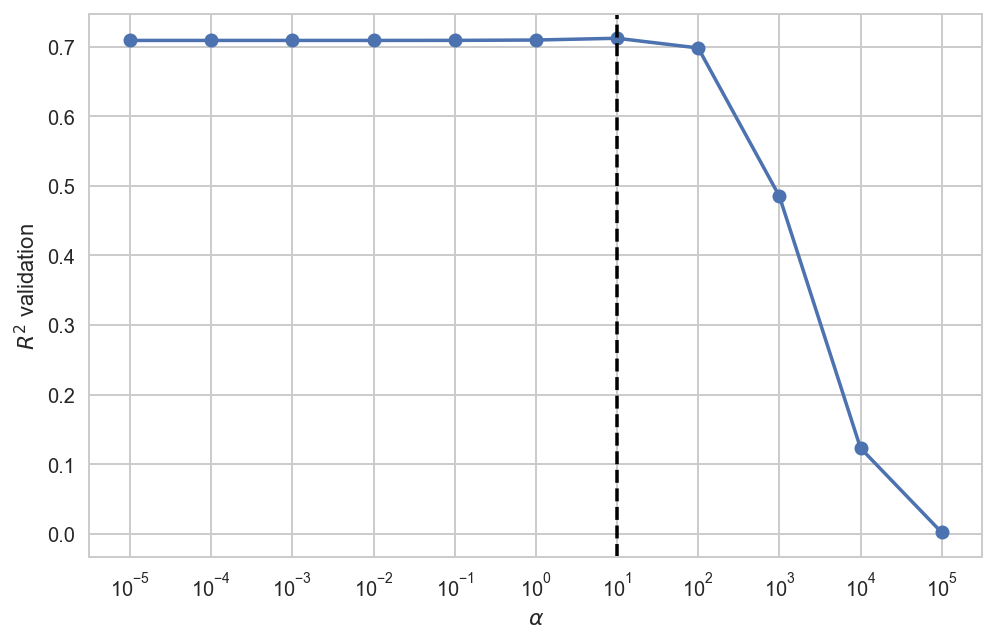

In [120]:
alphas = params['alpha']
scores = ridge.cv_results_['mean_test_score']

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(alphas, scores, '-o')
ax.axvline(ridge.best_params_['alpha'], ls='--', c='k')
ax.set_xscale('log', base=10)
ax.set_xticks(alphas)
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$R^2$ validation')
plt.show()

In [121]:
ridge.best_estimator_.coef_

array([-0.7717,  0.9177, -0.0782,  0.9305, -1.9102,  3.0212,  0.2716,
       -2.6628,  1.9515, -1.3286, -1.8082,  0.9555, -3.5542])

In [126]:
ols.coef_

array([-0.8368,  1.0703,  0.1145,  0.9132, -2.1927,  2.939 ,  0.3696,
       -2.9281,  2.6273, -1.9361, -1.8885,  0.9665, -3.7143])

### Lasso implement

In [137]:
params = {'alpha': np.logspace(-5, 5, 11)}
lasso = GridSearchCV(Lasso(), params, cv=5).fit(XTrainScaled, yTrain)
lasso.best_params_

{'alpha': 0.01}

In [138]:
r2Train = lasso.score(XTrainScaled, yTrain)
r2Test = lasso.score(XTestScaled, yTest)

print(f'R-squared training: {r2Train:.2%}')
print(f'R-squared testing: {r2Test:.2%}')

R-squared training: 75.11%
R-squared testing: 68.65%


In [139]:
yTrainPred = lasso.predict(XTrainScaled)
yTestPred = lasso.predict(XTestScaled)

rmseTrain = MSE(yTrain, yTrainPred, squared=False)
rmseTest =  MSE(yTest, yTestPred, squared=False)

print(f'RMSE training: {rmseTrain:.2f}')
print(f'RMSE testing: {rmseTest:.2f}')

RMSE training: 4.57
RMSE testing: 5.19


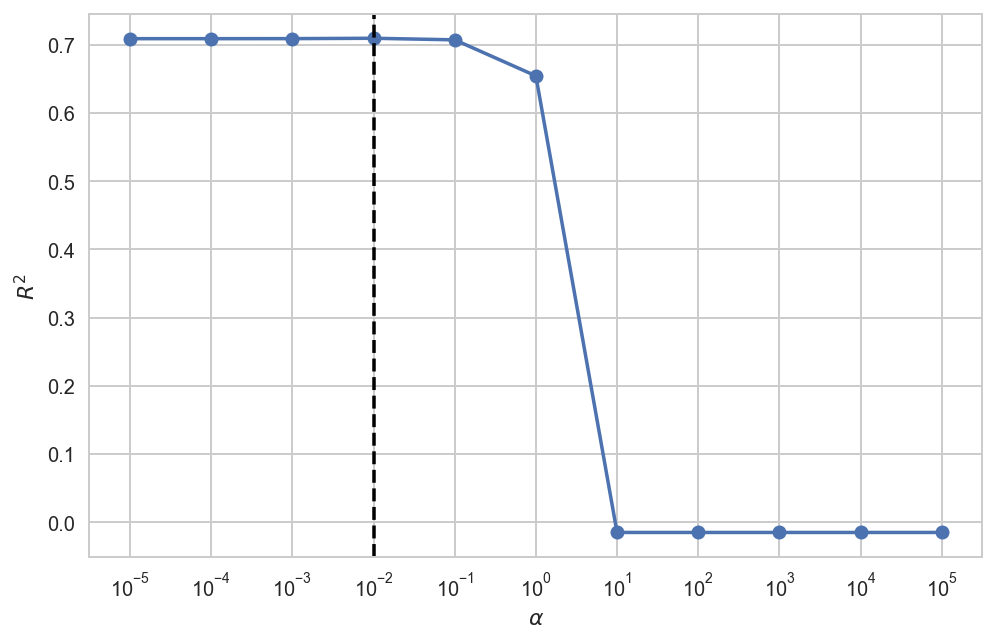

In [143]:
alphas = params['alpha']
scores = lasso.cv_results_['mean_test_score']

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(alphas, scores, '-o')
ax.axvline(lasso.best_params_['alpha'], ls='--', c='k')
ax.set_xscale('log', base=10)
ax.set_xticks(alphas)
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$R^2$')
plt.show()

#### Feature importances
Hồi quy Lasso có thể sử dụng để loại bỏ các biến không liên quan - có tương quan thấp với output, nhờ vào khả năng giảm được các hệ số về 0.

In [160]:
dfImp = pd.DataFrame({
    'feature': dfBoston.columns[:-1],
    'ols': np.abs(ols.coef_),
    'ridge': np.abs(ridge.best_estimator_.coef_),
    'lasso': np.abs(lasso.best_estimator_.coef_)
})
dfImp = dfImp.melt(id_vars='feature', var_name='regression', value_name='importance')

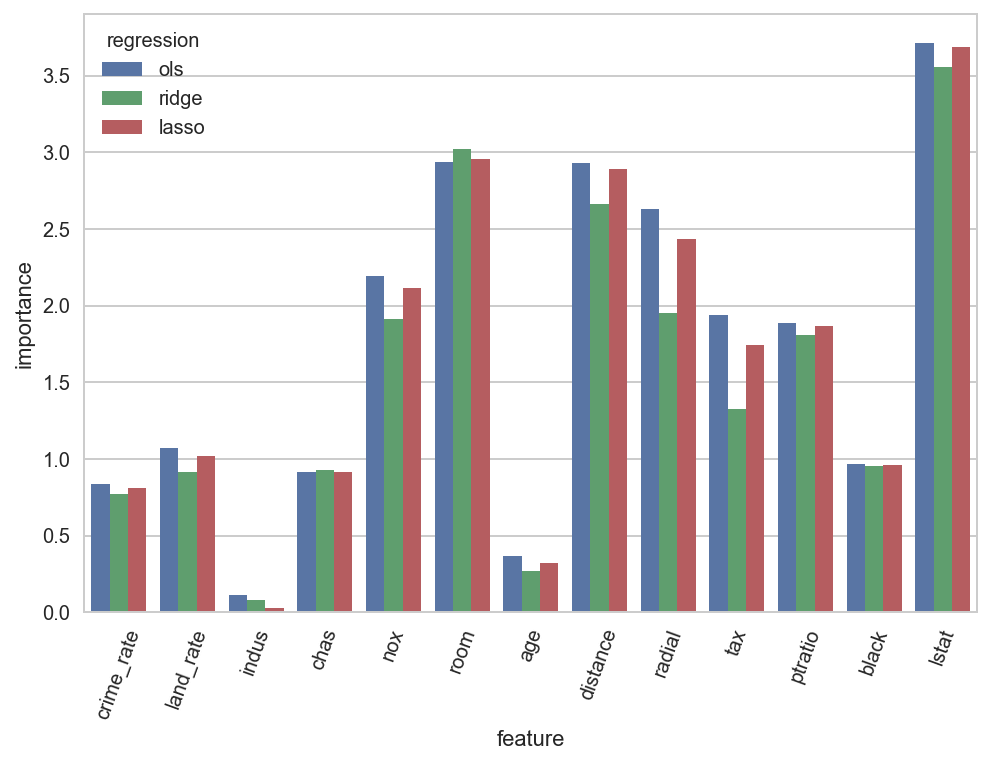

In [159]:
sns.barplot(data=dfImp, x='feature', y='importance', hue='regression')
plt.xticks(rotation=70)
plt.show()

In [ ]:
dfBoston.columns

Index(['crime_rate', 'land_rate', 'indus', 'chas', 'nox', 'room', 'age',
       'distance', 'radial', 'tax', 'ptratio', 'black', 'lstat', 'price'],
      dtype='object')

## 1.3. Elastic Net
[Elastic Net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net) là sự kết hợp giữa hồi quy Ridge và Lasso. Hàm mất mát sẽ có dạng:

$$\begin{aligned}
\text{obj}(\mathbf{w})
&= L(\mathbf{w})+\Omega(\mathbf{w}) \\
&= \frac{1}{2N}\sum(y_n-\hat{y}_n)^2 +
\alpha\left(\beta\sum{|w_n|}+\frac{1-\beta}{2}\sum{w_n^2}\right) \\
\end{aligned}$$

Hệ số $\alpha$ thể hiện tỉ trọng tương đối giữa đại lượng loss và đại lượng regularization. Trong khi đó, hệ số $\beta$ thể hiện tỉ trọng giữa $l_1$ và $l_2$ trong tổng thể regularization.

# 2. Polynomial Regression (Hồi quy phi tuyến)

## 2.1. Hồi quy phi tuyến

Thực tế, hồi quy tuyến tính là trường hợp đơn giản nhất của hồi quy phi tuyến. Hồi quy phi tuyến sử dụng các hàm phi tuyến bậc cao để diễn tả mối quan hệ giữa biến ra và các biến đầu vào, trong khi hồi quy tuyến tính sử dụng hàm bậc 1. Hồi quy phi tuyến thực chất là sử dụng hồi quy tuyến tính trên dữ liệu đã được biến đổi. Để cho dễ hiểu, giả sử ta có 2 biến đầu vào $(\mathbf{x}_1,\mathbf{x}_2$) và biến đầu ra $\mathbf{y}$. Áp dụng hồi quy tuyến tính lên tập biến đầu vào đã được biến đổi ví dụ như $(\mathbf{x}_1, \mathbf{x}_1^2, \mathbf{x}_2)$, $(\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_1^2, \mathbf{x}_2^2, \mathbf{x}_1\mathbf{x}_2)$ hay $(\mathbf{x}_1^{-1}, \ln\mathbf{x}_2)$ ta có hàm hồi quy phi tuyến.

Hạn chế lớn nhất của hồi quy phi tuyến là mô hình dễ bị overfit. Trong trường hợp có 1 hàm số fit hoàn toàn với mọi điểm dữ liệu train, nó đồng thời cũng sẽ fit với các điểm dữ liệu nhiễu và tất nhiên không thể có kết quả dự đoán tốt trên tập dữ liệu mới hoàn toàn. Chính vì vậy, cách chọn đúng hàm số để biểu diễn mối quan hệ giữa $X$ và $y$ là điều quan trọng. Để làm được điều đó chúng ta cần visualize các biến và xem xét kĩ các điểm dữ liệu và tất cả outlier có thể có.

## 2.2. Thực thi

Trong ví dụ dưới đây chúng ta sẽ sử dụng 1 biến đầu vào là LSTAT ($\mathbf{x}$) để dự đoán giá nhà PRICE ($\mathbf{y}$). Đầu tiên chúng ta cần visualize mối quan hệ giữa $\mathbf{x}$ và $\mathbf{y}$ , chú ý rằng 2 trục x và y phải cùng 1 độ đo. Sau đó thử nhiều hàm để chọn ra 1 hàm phù hợp nhất để diễn tả mối quan hệ tổng quát giữa $\mathbf{x}$ và $\mathbf{y}$. Nếu 2 trục x và y không cùng độ đo có thể làm cho độ dốc và hình dạng biểu đồ thay đổi và làm cho chúng ta chọn sai hàm số.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
dfBoston = pd.read_csv('data/boston.csv')

x = dfBoston.lstat.values.reshape(-1,1)
y = dfBoston.price.values

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=11)

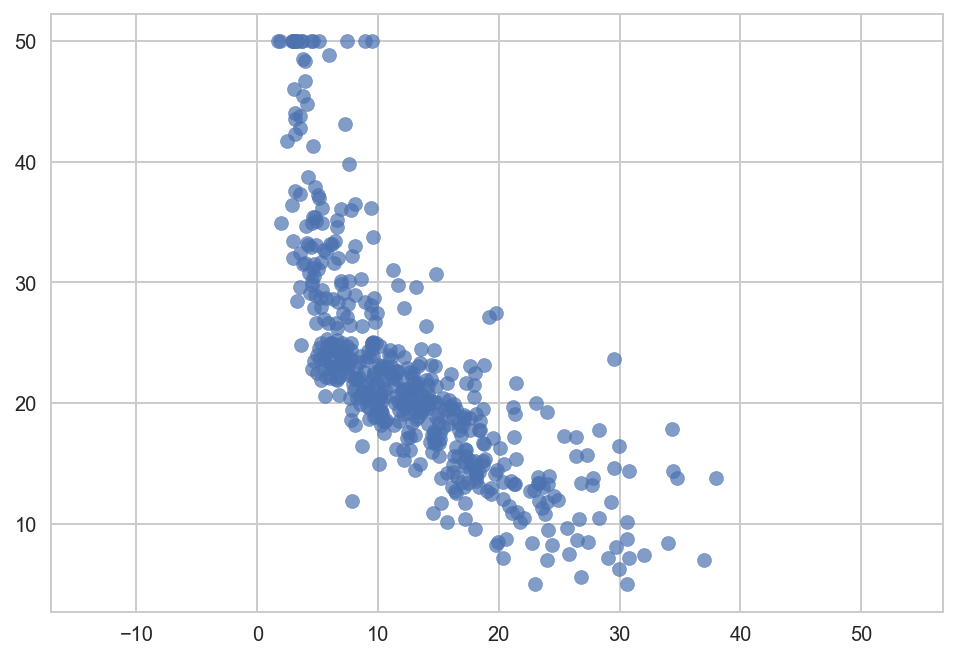

In [16]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7)
ax.axis('equal')
plt.show()

#### Monomial Regression

Để mô tả xu thế của dữ liệu, một đường thẳng (trong Linear regression) là một phương án quá đơn giản, vì vậy chúng ta cần 1 đường cong. Hàm số mũ sẽ phù hợp trong trường hợp này:

$$\hat{\mathbf{y}} = w_0+w_1\mathbf{x}^{-\frac{3}{4}}$$

In [17]:
transformer = FunctionTransformer(lambda x: x**(-3/4))
xNew = transformer.transform(x)

xTrain, xTest, yTrain, yTest = train_test_split(xNew, y, test_size=0.2, random_state=7)

In [18]:
ols = LinearRegression().fit(xTrain, yTrain)

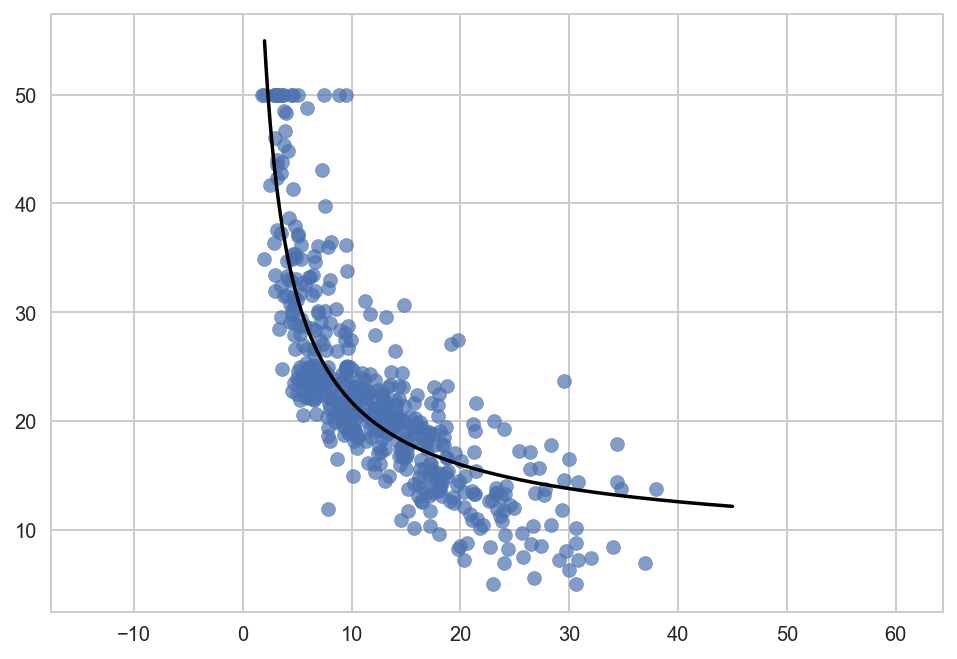

In [19]:
xPlot = np.linspace(2, 45, 1000).reshape(-1,1)
yPlot = ols.predict(transformer.transform(xPlot))

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7)
ax.plot(xPlot, yPlot, 'k')
ax.axis('equal')
plt.show()

In [22]:
ols.score(xTrain, yTrain)

0.6585612704728155

In [23]:
ols.score(xTest, yTest)

0.6699642428674772

#### Polynomial Regression

Monomial Regression đưa ra kết quả chưa được tốt, hãy thử chuyển sang Polynomial Regression. Theo biểu đồ, phân phối của dữ liệu gần giống 1 phần của đường parabol. Hàm hồi quy sẽ có dạng:

$$\hat{\mathbf{y}} = w_0+w_1\mathbf{x}+w_2\mathbf{x}^2$$

In [24]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
xNew = transformer.fit_transform(x)

xTrain, xTest, yTrain, yTest = train_test_split(xNew, y, test_size=0.2, random_state=7)

In [25]:
ols = LinearRegression()
ols.fit(xTrain, yTrain)

LinearRegression()

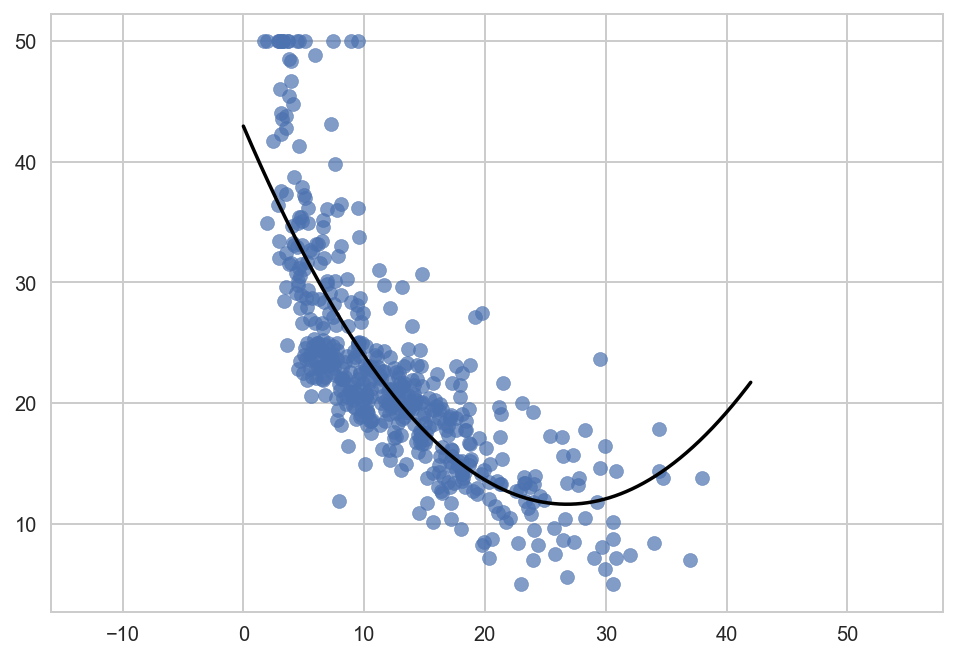

In [26]:
xPlot = np.linspace(0, 42, 1000).reshape(-1,1)
yPlot = ols.predict(transformer.transform(xPlot))

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7)
ax.plot(xPlot, yPlot, 'k')
ax.axis('equal')
plt.show()

In [28]:
ols.score(xTrain, yTrain)

0.6445208575259154

In [29]:
ols.score(xTest, yTest)

0.6246852597464592